In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.utils import to_categorical

%matplotlib inline

In [12]:
train_data = pd.read_csv('../data/fashion-mnist_train.csv')
test_data = pd.read_csv('../data/fashion-mnist_test.csv')

In [23]:
img_rows, img_cols = 28, 28
img_shape = (img_rows, img_cols, 1)

In [19]:
def extract_data(data):
    label = data.label.values
    feature = data.drop('label', axis=1).values
    label = to_categorical(label)
    return feature, label

In [44]:
train_feature, train_label = extract_data(train_data)
test_feature, test_lable = extract_data(test_data)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(train_feature, train_label, test_size=0.2, random_state=0)

In [46]:
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_val = X_val.reshape(-1, img_rows, img_cols, 1)
test_feature = test_feature.reshape(-1, img_rows, img_cols, 1)

In [47]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
test_feature = test_feature.astype('float32')

In [48]:
X_train /= 255.0
X_val /= 255.0
test_feature /= 255.0

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [51]:
batch_size = 256
num_classes = 10
epochs = 50

In [57]:
model = Sequential()
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 kernel_initializer='he_normal', 
                 input_shape=img_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3), 
                 activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [59]:
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 29s - loss: 0.8517 - acc: 0.6828 - val_loss: 0.5096 - val_acc: 0.8139
Epoch 2/50
48000/48000 [==============================] - 31s - loss: 0.5243 - acc: 0.8052 - val_loss: 0.4045 - val_acc: 0.8512
Epoch 3/50
48000/48000 [==============================] - 31s - loss: 0.4433 - acc: 0.8393 - val_loss: 0.3579 - val_acc: 0.8744
Epoch 4/50
48000/48000 [==============================] - 29s - loss: 0.3968 - acc: 0.8562 - val_loss: 0.3222 - val_acc: 0.8808
Epoch 5/50
48000/48000 [==============================] - 30s - loss: 0.3669 - acc: 0.8660 - val_loss: 0.3091 - val_acc: 0.8881
Epoch 6/50
48000/48000 [==============================] - 40s - loss: 0.3463 - acc: 0.8732 - val_loss: 0.3010 - val_acc: 0.8918
Epoch 7/50
48000/48000 [==============================] - 30s - loss: 0.3336 - acc: 0.8795 - val_loss: 0.2750 - val_acc: 0.9010
Epoch 8/50
48000/48000 [==============================

ValueError: Error when checking input: expected conv2d_5_input to have 4 dimensions, but got array with shape (60000, 784)

In [62]:
score = model.evaluate(test_feature, test_lable, verbose=0)

In [63]:
print(score)

[0.19623403572440148, 0.92930000000000001]


In [64]:
model.save('model.h5')

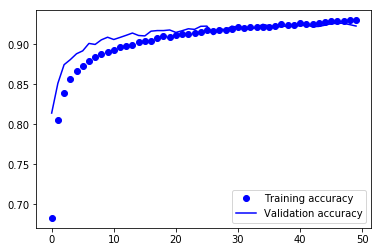

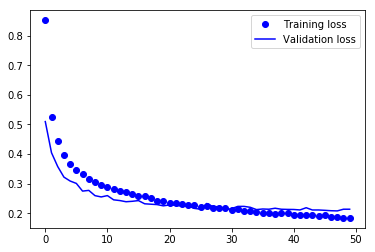

In [67]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

In [68]:
predicted_classes = model.predict_classes(test_feature)

 9888/10000 [============================>.] - ETA: 0s

In [75]:
print(metrics.classification_report(test_data.label.values, predicted_classes))

             precision    recall  f1-score   support

          0       0.85      0.90      0.88      1000
          1       1.00      0.99      0.99      1000
          2       0.87      0.91      0.89      1000
          3       0.92      0.95      0.94      1000
          4       0.91      0.88      0.90      1000
          5       0.99      0.98      0.99      1000
          6       0.83      0.74      0.78      1000
          7       0.96      0.97      0.97      1000
          8       0.98      0.98      0.98      1000
          9       0.97      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000



In [76]:
metrics.confusion_matrix(test_data.label.values, predicted_classes)

array([[902,   1,  21,   8,   0,   0,  62,   1,   5,   0],
       [  0, 989,   1,   7,   1,   0,   2,   0,   0,   0],
       [ 17,   0, 912,  13,  26,   0,  29,   0,   3,   0],
       [ 16,   1,   3, 950,  18,   0,  12,   0,   0,   0],
       [  0,   0,  43,  27, 882,   0,  47,   0,   1,   0],
       [  0,   0,   0,   0,   0, 984,   0,   9,   3,   4],
       [119,   1,  67,  23,  42,   0, 744,   0,   4,   0],
       [  0,   0,   0,   0,   0,   5,   0, 975,   0,  20],
       [  5,   0,   5,   0,   1,   1,   2,   0, 985,   1],
       [  0,   0,   0,   0,   0,   0,   0,  30,   0, 970]])

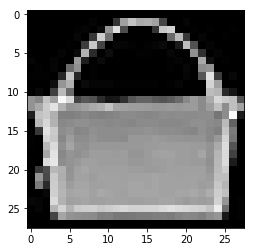

In [81]:
test_im = X_train[13]
plt.imshow(test_im.reshape(28,28), cmap='gray', interpolation='none')
plt.show()

In [84]:
model.layers

/Users/stardust/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


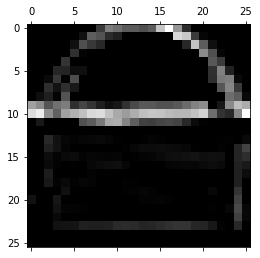

In [82]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='gray')

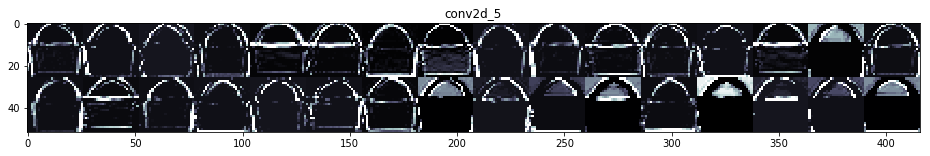

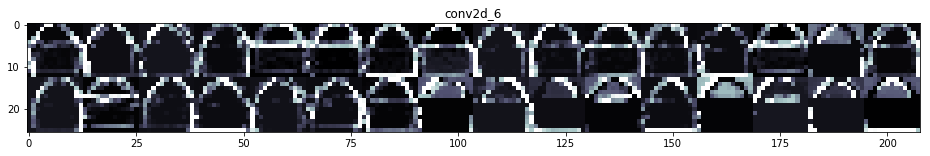

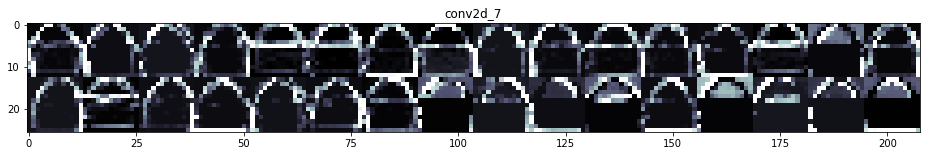

In [83]:
layer_names = []
for layer in model.layers[:-1]:
    if isinstance(layer, Conv2D):
        layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features / images_per_row
    n_cols = int(n_cols)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='bone')
